# Project 2

## Task 1: Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("data/gym_members_exercise_tracking.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [3]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [4]:
df.head(20)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


### Features

Age: Age of the gym member.
Gender: Gender of the gym member (Male/Female).
Weight (kg): Gym member's weight in kilograms.
Height (m): Member's height in meters.
Max_BPM: Maximum heart rate (beats per minute) during workout sessions.
Avg_BPM: Average heart rate during workout sessions.
Resting_BPM: Heart rate at rest before workout.
Session_Duration (hours): Duration of each workout session in hours.
Calories_Burned: Total calories burned during each session.
Workout_Type: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
Fat_Percentage: Body fat percentage of the member.
Water_Intake (liters): Daily water intake during workouts.
Workout_Frequency (days/week): Number of workout sessions per week.
Experience_Level: Level of experience, from beginner (1) to expert (3).
BMI: Body Mass Index, calculated from height and weight.

## Visualizations and insights

<Axes: xlabel='Gender', ylabel='count'>

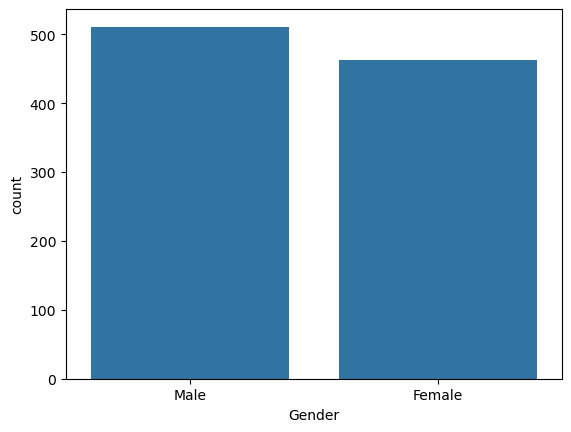

In [5]:
sns.countplot(x='Gender', data=df)
#Insight: There are more males in this dataset than females

<Axes: xlabel='Workout_Type', ylabel='count'>

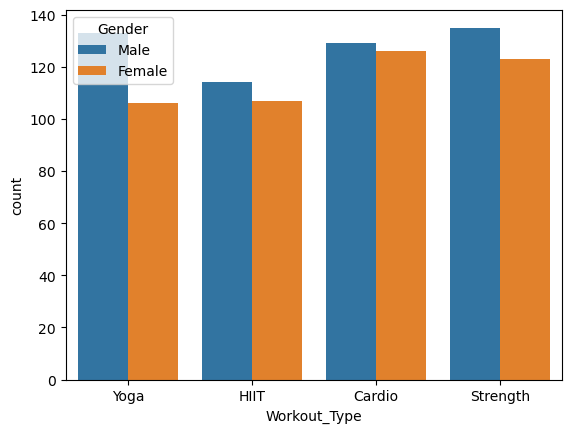

In [6]:
sns.countplot(x='Workout_Type', data=df, hue="Gender")
#Since there are more males in the dataset, there is a higher number of males than females in each workout type.

<Axes: xlabel='Gender', ylabel='BMI'>

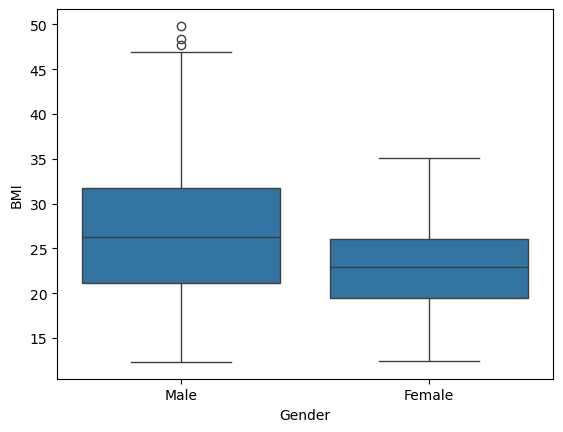

In [7]:
sns.boxplot(data=df, x= "Gender", y= 'BMI' )
#There are some outliers in the BMI of males

<Axes: xlabel='Gender', ylabel='Fat_Percentage'>

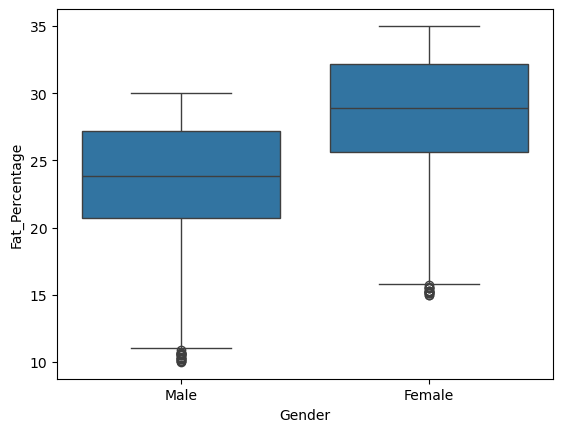

In [8]:
sns.boxplot(data=df, x= "Gender", y= 'Fat_Percentage' )
#There are multiple outliers in the fat percentage of males and females

<Axes: xlabel='Gender', ylabel='BMI'>

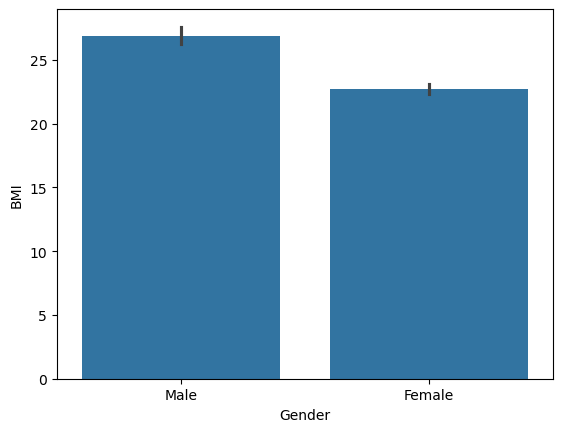

In [9]:
sns.barplot(x='Gender',y='BMI',data=df)
#On average, males tend to have a higher BMI than females.

<Axes: xlabel='Gender', ylabel='Fat_Percentage'>

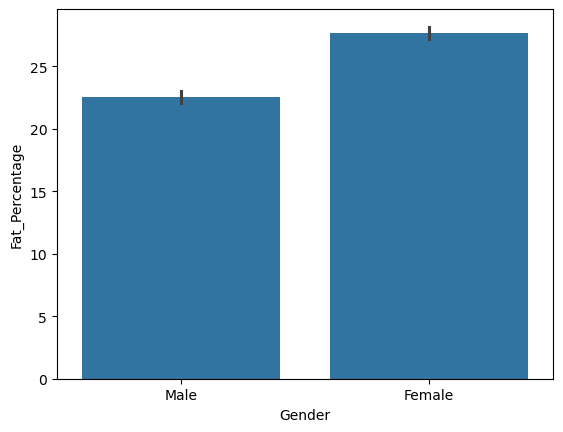

In [10]:
sns.barplot(x='Gender',y='Fat_Percentage',data=df)
#However, females tend to have a higher fat percentage than males

### Preprocessing

In [11]:
#Determining if there null values in the dataset
print("\nMissing values per feature:")
print(df.isnull().sum())


Missing values per feature:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [12]:
#Since there are no null values in the dataset and the dataset is clean, there is no need to delete rows or filling missing values.

In [13]:
#Using get_dummies to encode the categorical feature "Workout_Type"
df= pd.get_dummies(df, columns=["Workout_Type"])

In [14]:
#Explicity convert them to ints since get_dummies makes them booleans.
cols = ['Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']
df[cols] = df[cols].astype(int)

In [15]:
#Creating a column called label to label encode the categorical and target feature "Gender"
df["label"] = np.where(df['Gender'].str.contains("Male"), 1, 0)

In [16]:
df.shape
df.head(20)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,label
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,0,0,0,1,1
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,1,0,0,0
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,1,0,0,0,0
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,0,0,1,0,1
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,0,0,1,0,1
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,15.5,2.7,5,3,20.55,0,1,0,0,0
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,21.3,2.3,3,2,23.76,1,0,0,0,1
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,30.6,1.9,3,2,30.57,1,0,0,0,0
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,28.9,2.6,4,2,32.34,0,0,1,0,1
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,29.7,2.7,3,1,30.07,1,0,0,0,1


### Features selected

Most important features selected are  Gender, Fat_Percentage, BMI, and Workout_Type.
I'm going to predict the gender of a person based on their fat percentage, BMI, and Workout_Type.

# Task 2: Train Models

### Classification Problem - Logistic Regression and Random Forest

In [17]:
#Categorical features - Workout_Type
#Numerical features - Fat_Percentage, BMI
#Target (categorical) - Gender

features = df[['Fat_Percentage', 'BMI', 'Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']]
target = df['label']

## Training Models

In [18]:
#Test-Train-Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

### Model 1: Logistic Regression

In [19]:
#Logistic Regression

#Optimization algorithm used: gridSearchCV

#Explanation of gridSearchCV

# I'm using gridSearchCV for optimizing the model because gridSearchCV uses hyperparameter tuning and cross-validation in order to find
#the best hyperparameters for the training of the model. gridSearchCV uses a predefined parameter grid to test all of the different hyperparameters and
#evaluates that configuration of hyperparameters through cross-validation, ultimately, finding the optimal hyperparameters based on its CV score.

param_grid =  [{
        'penalty': ['l2', None],
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'C': np.logspace(-3, 3, 3),
        'max_iter': [100, 1000, 2500, 5000, 10000]
    }]

#Techniques: Hyperparameter Tuning, Cross-validation

#Explanation

#Hyperparamater Tuning is an optimization technique that involves modifying the hyperparameter values of a machine learning model to find the optimal combination.

#Cross-validation is an optimization technique that assesses the performance of a machine learning model on unseen data. Data is divided into multiple subsets
#which are considered as folds. It uses one of the folds for testing and the rest of the folds for training, this is repeated multiple times. Finally, an evaluation
#metric is used and averaged for each fold to determine the effectiveness/performance of the model.


lr = LogisticRegression(random_state=42) 

lrgridSearch = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)
lrgridSearch.fit(X_train, y_train)
print("Best Hyper-Parameters used:", lrgridSearch.best_params_)


Best Hyper-Parameters used: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


### Model 2: Random Forest

In [20]:
#Random Forest

#Optimization algorithm used: gridSearchCV

#Explanation of gridSearchCV

# I'm using gridSearchCV for optimizing the model because gridSearchCV uses hyperparameter tuning and cross-validation in order to find
#the best hyperparameters for the training of the model. gridSearchCV uses a predefined parameter grid to test all of the different hyperparameters and
#evaluates that configuration of hyperparameters through cross-validation, ultimately, finding the optimal hyperparameters based on its CV score.

param_grid = [{
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5,10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}]

#Techniques: Hyperparameter Tuning, Cross-validation

#Explanation

#Hyperparamater Tuning is an optimization technique that involves modifying the hyperparameter values of a machine learning model to find the optimal combination.

#Cross-validation is an optimization technique that assess the performance of a machine learning model on unseen data. Data is divided into multiple subsets
#which are considered as folds. It uses one of the folds for testing and the rest of the folds for training, this is repeated multiple times. Finally, an evaluation
#metric is used and averaged for each fold to determine the effectiveness/performance of the model.

rf = RandomForestClassifier(random_state=42)

rfgridsearch = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose = True)

rfgridsearch.fit(X_train, y_train)

print("Best Parameters:", rfgridsearch.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


# Task 3: Test and Evaluate

In [21]:
#Predictions
lr_predictions = lrgridSearch.predict(X_test)
rf_predictions = rfgridsearch.predict(X_test)

In [22]:
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.2f}")
report = classification_report(y_test, lr_predictions, target_names=['Female', 'Male'], output_dict=True)
metrics_df = pd.DataFrame(report).T.loc[['Female', 'Male'], ['precision', 'recall', 'f1-score']]
print(metrics_df)


Logistic Regression Metrics:
Accuracy: 0.72
        precision    recall  f1-score
Female   0.769841  0.651007  0.705455
Male     0.686747  0.797203  0.737864


In [23]:
print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.2f}")
report = classification_report(y_test, rf_predictions, target_names=['Female', 'Male'], output_dict=True)
metrics_df = pd.DataFrame(report).T.loc[['Female', 'Male'], ['precision', 'recall', 'f1-score']]

print(metrics_df)


Random Forest Metrics:
Accuracy: 0.85
        precision    recall  f1-score
Female   0.913386  0.778523  0.840580
Male     0.800000  0.923077  0.857143


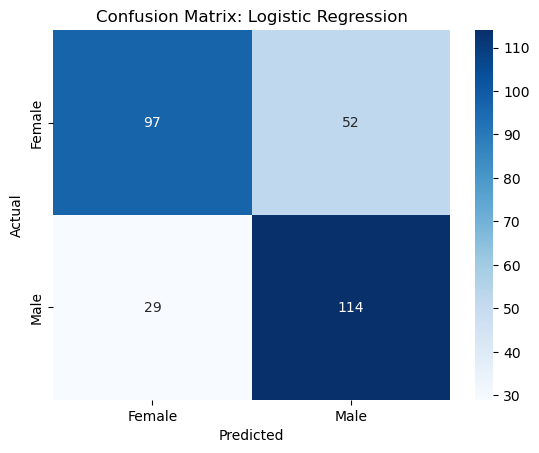

In [24]:
#Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

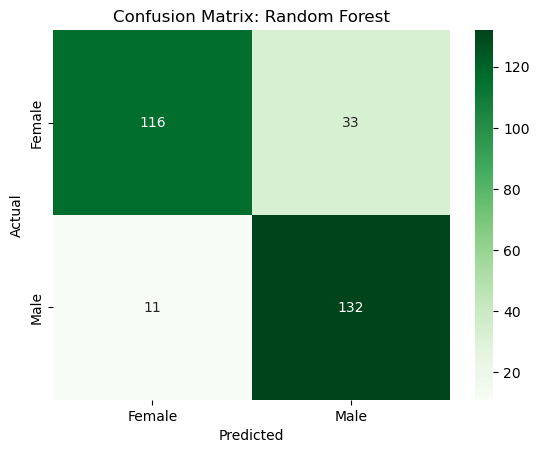

In [25]:
#Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Evaluation Metrics
## Accuracy, Precision, Recall, and F1-score
I picked these since these are the common evaluation metrics for classification models.

Accuracy = (TP + TN) / (TP + TN + FP + FN)

The accuracy score measures how well the model did in predicting the correct gender (Male or Female), Male --> positive, Female --> negative, and represents the overall correctness of the model. It is different from precision and recall because accuracy does not only focus on positives, it is more general and a better indicator of overall performance.

Precision = TP / (TP + FP)

The Precision score measures how often and correctly the model predicts a positive.
Unlike recall, it focuses on how correctly positives are predicted.

Recall =  TP / (TP + FN)

The recall (sensitivity) score measures how well the model detects positives out of the total number of positives in the database. Unlike precision, it focuses on how correctly are positives identified.

F1-score = 2 * (Precision * Recall)/(Precision + Recall)

The F1-score is the combination of precision and recall scores and a measure that helps indicate the overall performance of the model. It is similar to accuracy in that it is good at quantifying the overall performance of a model.


# Task 4: Make Comparison

### Outcomes

RandomForest (Accuracy: 0.85) did better than LogisticRegression (Accuracy: 0.72) in predicting the correct gender based on their BMI, Fat_Percentage, and the workout type they engage in.

Strengths of Logistic Regression:
- Simple model that is easy to implement
- Is computationally efficient
- Works very well when the decision boundary is linear

Weaknesses of Logistic Regression:
- Struggles with non-linear relationships
- Is sensitive to outliers
- Doesn't perform well with complex relationships

----------

Strengths of Random Forest:
- Good at handling non-linear relationships
- Not sensitive to outliers
- Works well with unstructured and noisy data
- High accuracy score due to aggregation of predictions from multiple trees

Weaknesses of Random Forest:
- Often can be computationally expensive
- Can overfit without proper hyperparameter tuning
- More complex, therefore harder to interpret


The logistic regression navigated the data by assuming a linear relationship between the features (independent variables) and the target variable (dependent variable) and the log-odds of the target variable (gender). Essentially, trying to find a linear decision boundary to correctly determine the gender based on the BMI, Fat_Percentage, and Workout Type. On the other hand, random forest works by creating multiple decision trees on different subsets of the dataset where each tree considers the BMI, Fat_Percentage, and Workout Type of the person; the final prediction is then based on what the majority of the trees predicts. Random forest does not assume a linear relationship, it works well with non-linear relationships as well.

The performance of logistic regression was suboptimal because the relationship between the features and the target variable were not linear and logistic regression assumes a linear relationship between them, additionally, the dataset had multiple outliers and logistic regression models are sensitive to outliers and are not good at handling complex relationships, which helps explain why the performance was not optimal. In contrast, random forest does not assume a linear relationship and works well with non-linear relationships. Additionally, random forest is robust to outliers and handles complex relationships well, which explains why random forest did much better than logistic regression.
